# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
df_titanic=pd.read_csv('titanic_train.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
print(df_titanic.shape)

(891, 12)


# Exploratory Data Analysis(EDA):-

In [7]:
#Checking Columns:-

df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print("The shape of the dataset is:",df_titanic.shape)

The shape of the dataset is: (891, 12)


In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Description:-

In [10]:
df_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
df_titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [12]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Finding Null values:-

In [13]:
print(df_titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling the missing values:-

In [14]:
#drop the 'Cabin' column from the dataframe:

df_titanic=df_titanic.drop(columns='Cabin',axis=1)

In [15]:
#Replacing the missing values in 'Age' column with mean value:

df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)

In [16]:
#finding the mode value of 'Embarked' column:

print(df_titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [17]:
print(df_titanic['Embarked'].mode()[0])

S


In [18]:
#Replacing the missing values in 'Embarked' column with mode value:

df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0],inplace=True)

In [19]:
print(df_titanic.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: >

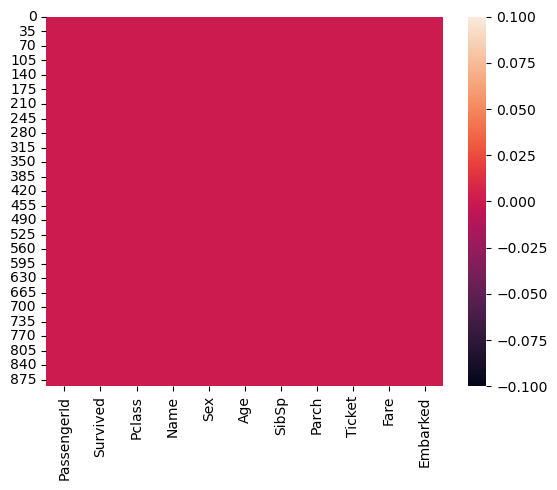

In [20]:
sns.heatmap(df_titanic.isnull())

In [21]:
male_ind=len(df_titanic[df_titanic['Sex']=='male'])
print('No of Males in Titanic:',male_ind)

No of Males in Titanic: 577


In [22]:
female_ind=len(df_titanic[df_titanic['Sex']=='female'])
print('No of Females in Titanic:',female_ind)

No of Females in Titanic: 314


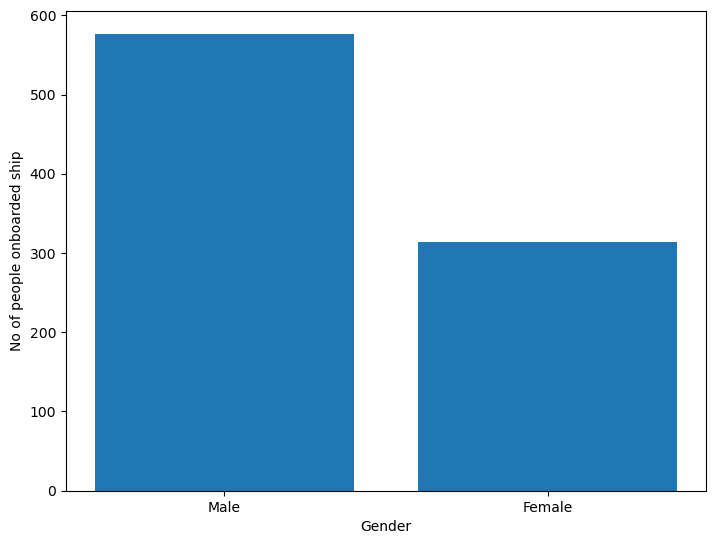

In [23]:
#Plotting

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=["Male","Female"]
index=[577,314]
ax.bar(gender,index)
plt.xlabel('Gender')
plt.ylabel('No of people onboarded ship')
plt.show()

# Data Analysis and Visualization:-

In [24]:
#Finding the number of people survived and not survived:

df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
sns.set()

# Countplot:

0    549
1    342
Name: Survived, dtype: int64

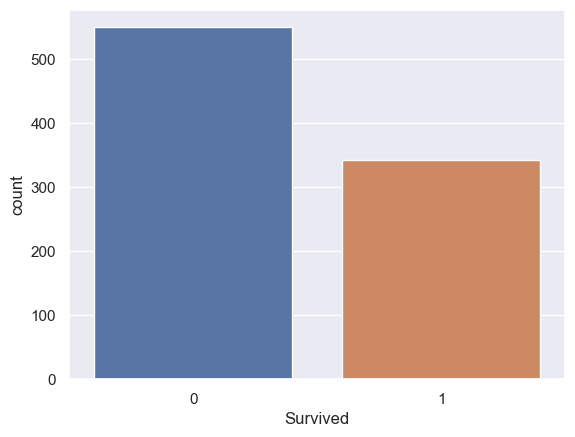

In [26]:
##Making the count plot for 'Survived' column:

sns.countplot(x='Survived',data=df_titanic)
df_titanic['Survived'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

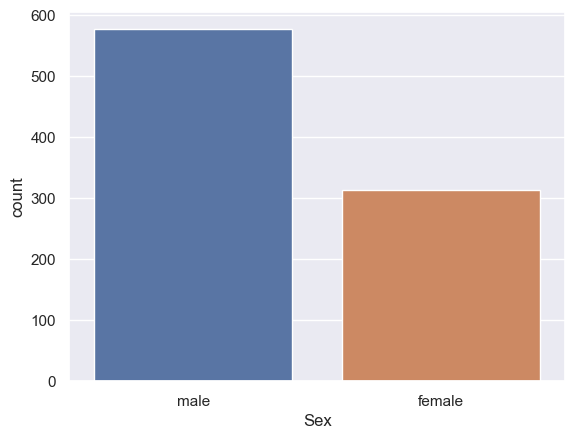

In [27]:
#Making the count plot for 'Sex' column:

sns.countplot(x='Sex',data=df_titanic)
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

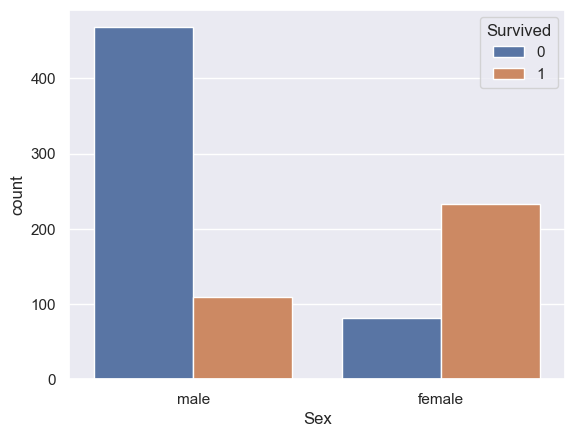

In [28]:
#Number of Survivors Gender wise:

sns.countplot(x='Sex', hue='Survived',data=df_titanic)
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

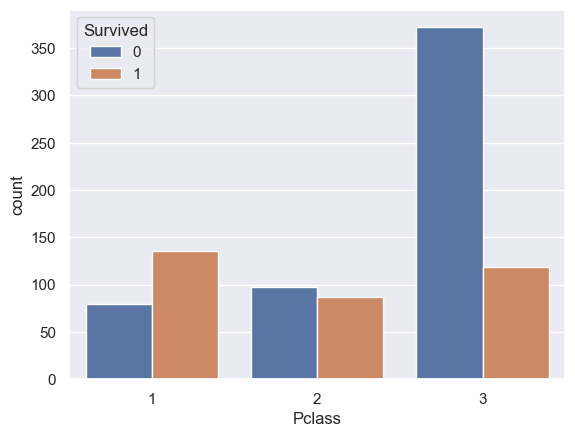

In [29]:
sns.countplot(x='Pclass', hue='Survived',data=df_titanic)
df_titanic['Sex'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

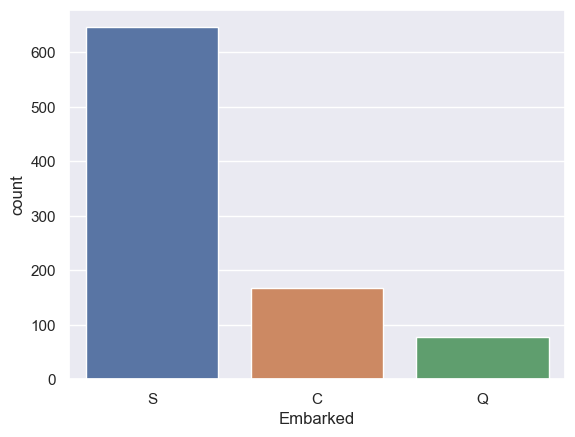

In [30]:
sns.countplot(x='Embarked',data=df_titanic)
df_titanic['Embarked'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

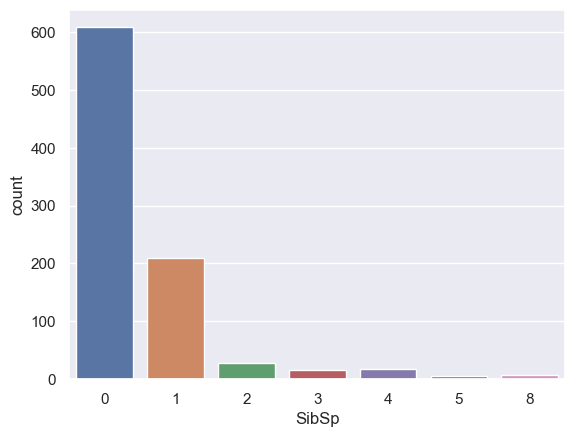

In [31]:
sns.countplot(x='SibSp',data=df_titanic)
df_titanic['SibSp'].value_counts()

In [32]:
def bar_chart(feature):
    survived=df_titanic[df_titanic['Survived']==1][feature].value_counts()
    dead=df_titanic[df_titanic['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

Survived:
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


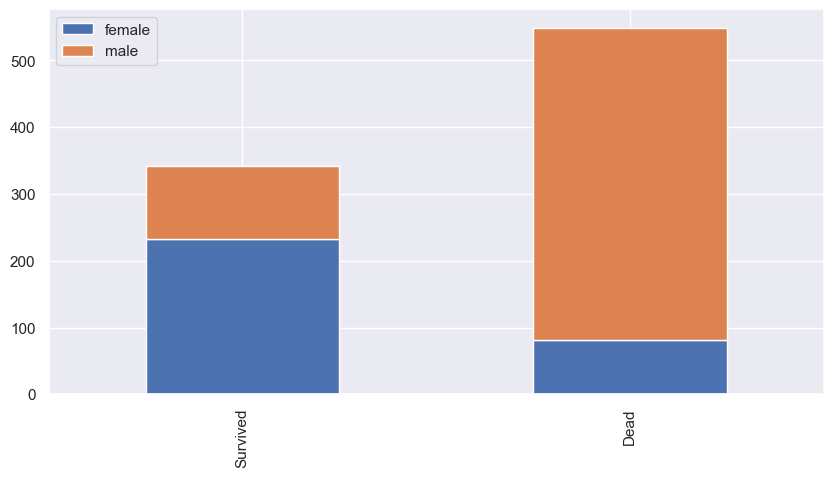

In [33]:
bar_chart('Sex')
print('Survived:\n',df_titanic[df_titanic['Survived']==1]['Sex'].value_counts())
print('Dead:\n',df_titanic[df_titanic['Survived']==0]['Sex'].value_counts())

The Chart confirms Women more likely survived than Men.

Survived:
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


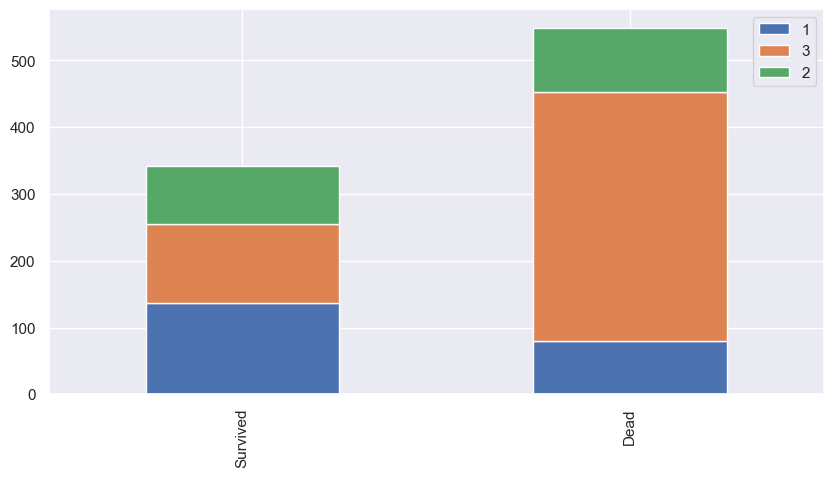

In [34]:
bar_chart('Pclass')
print('Survived:\n',df_titanic[df_titanic['Survived']==1]['Pclass'].value_counts())
print('Dead:\n',df_titanic[df_titanic['Survived']==0]['Pclass'].value_counts())

The Chart confirms 1st class more likely survived than other classes.
The Chart confirms 3rd class more likely dead than other classes.

Survived:
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


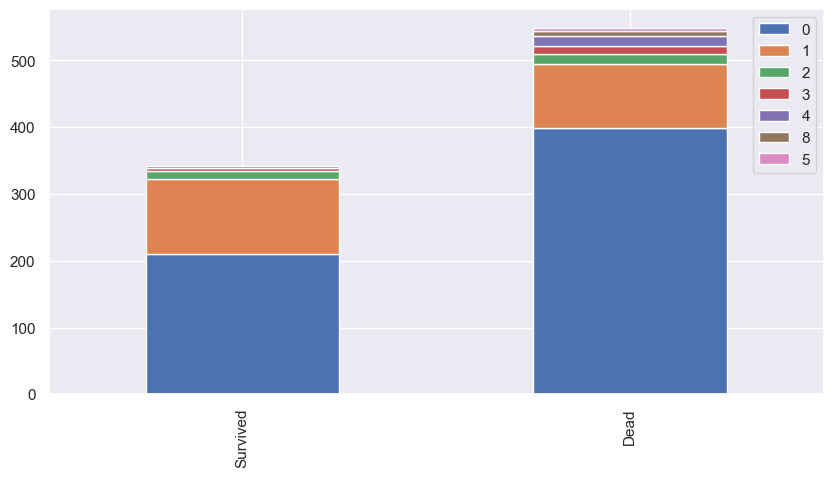

In [35]:
bar_chart('SibSp')
print('Survived:\n',df_titanic[df_titanic['Survived']==1]['SibSp'].value_counts())
print('Dead:\n',df_titanic[df_titanic['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.
The Chart confirms a person aboarded without siblings or spouse more likely dead.

Survived:
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


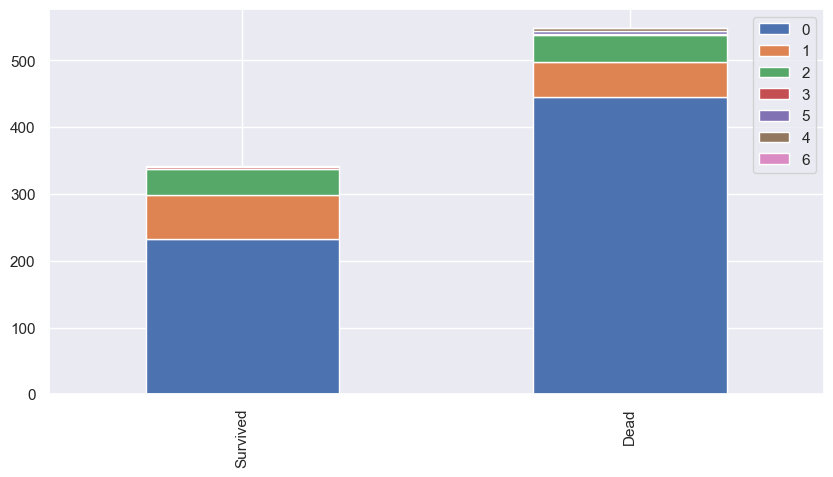

In [36]:
bar_chart('Parch')
print('Survived:\n',df_titanic[df_titanic['Survived']==1]['Parch'].value_counts())
print('Dead:\n',df_titanic[df_titanic['Survived']==0]['Parch'].value_counts())

The Chart confirms a person aboarded with more than 2 parents or children more likely survived. 
The Chart confirms a person aboarded alone more likely dead. 

Survived:
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


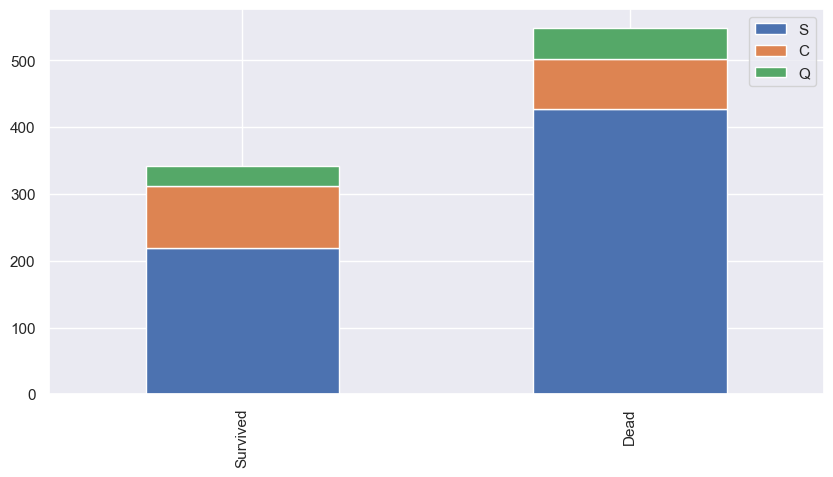

In [37]:
bar_chart('Embarked')
print('Survived:\n',df_titanic[df_titanic['Survived']==1]['Embarked'].value_counts())
print('Dead:\n',df_titanic[df_titanic['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.
The Chart confirms a person aboarded from Q more likely dead.
The Chart confirms a person aboarded from S more likely dead.

# PairPlot:-

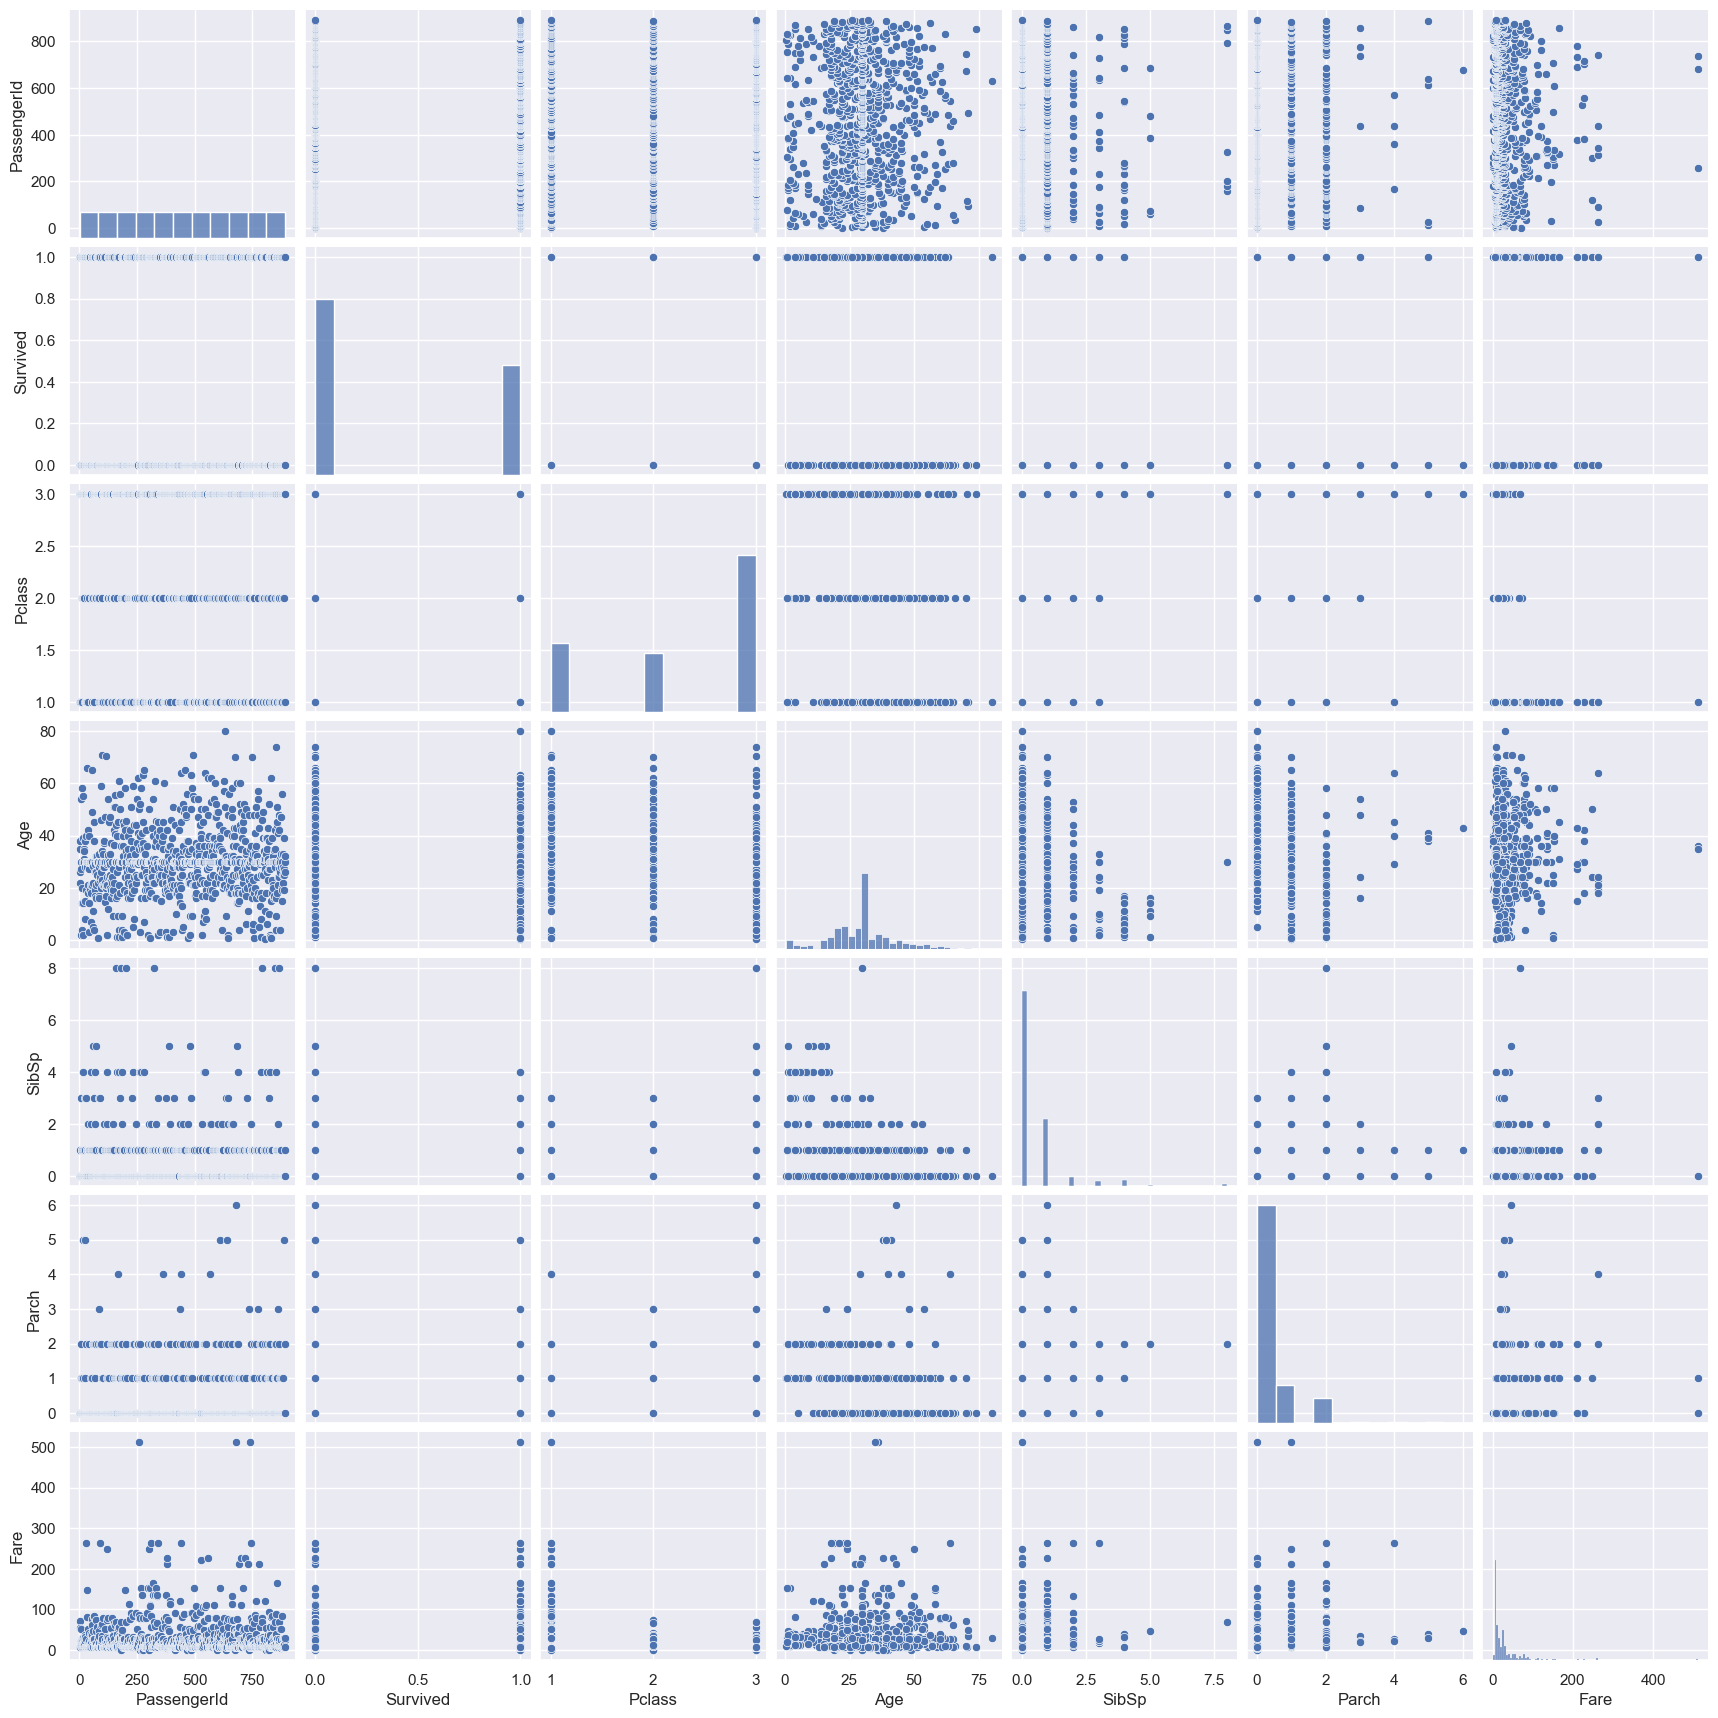

In [38]:
#Using the PairPlot:

sns.pairplot(df_titanic)
plt.show()

# Histogram:-

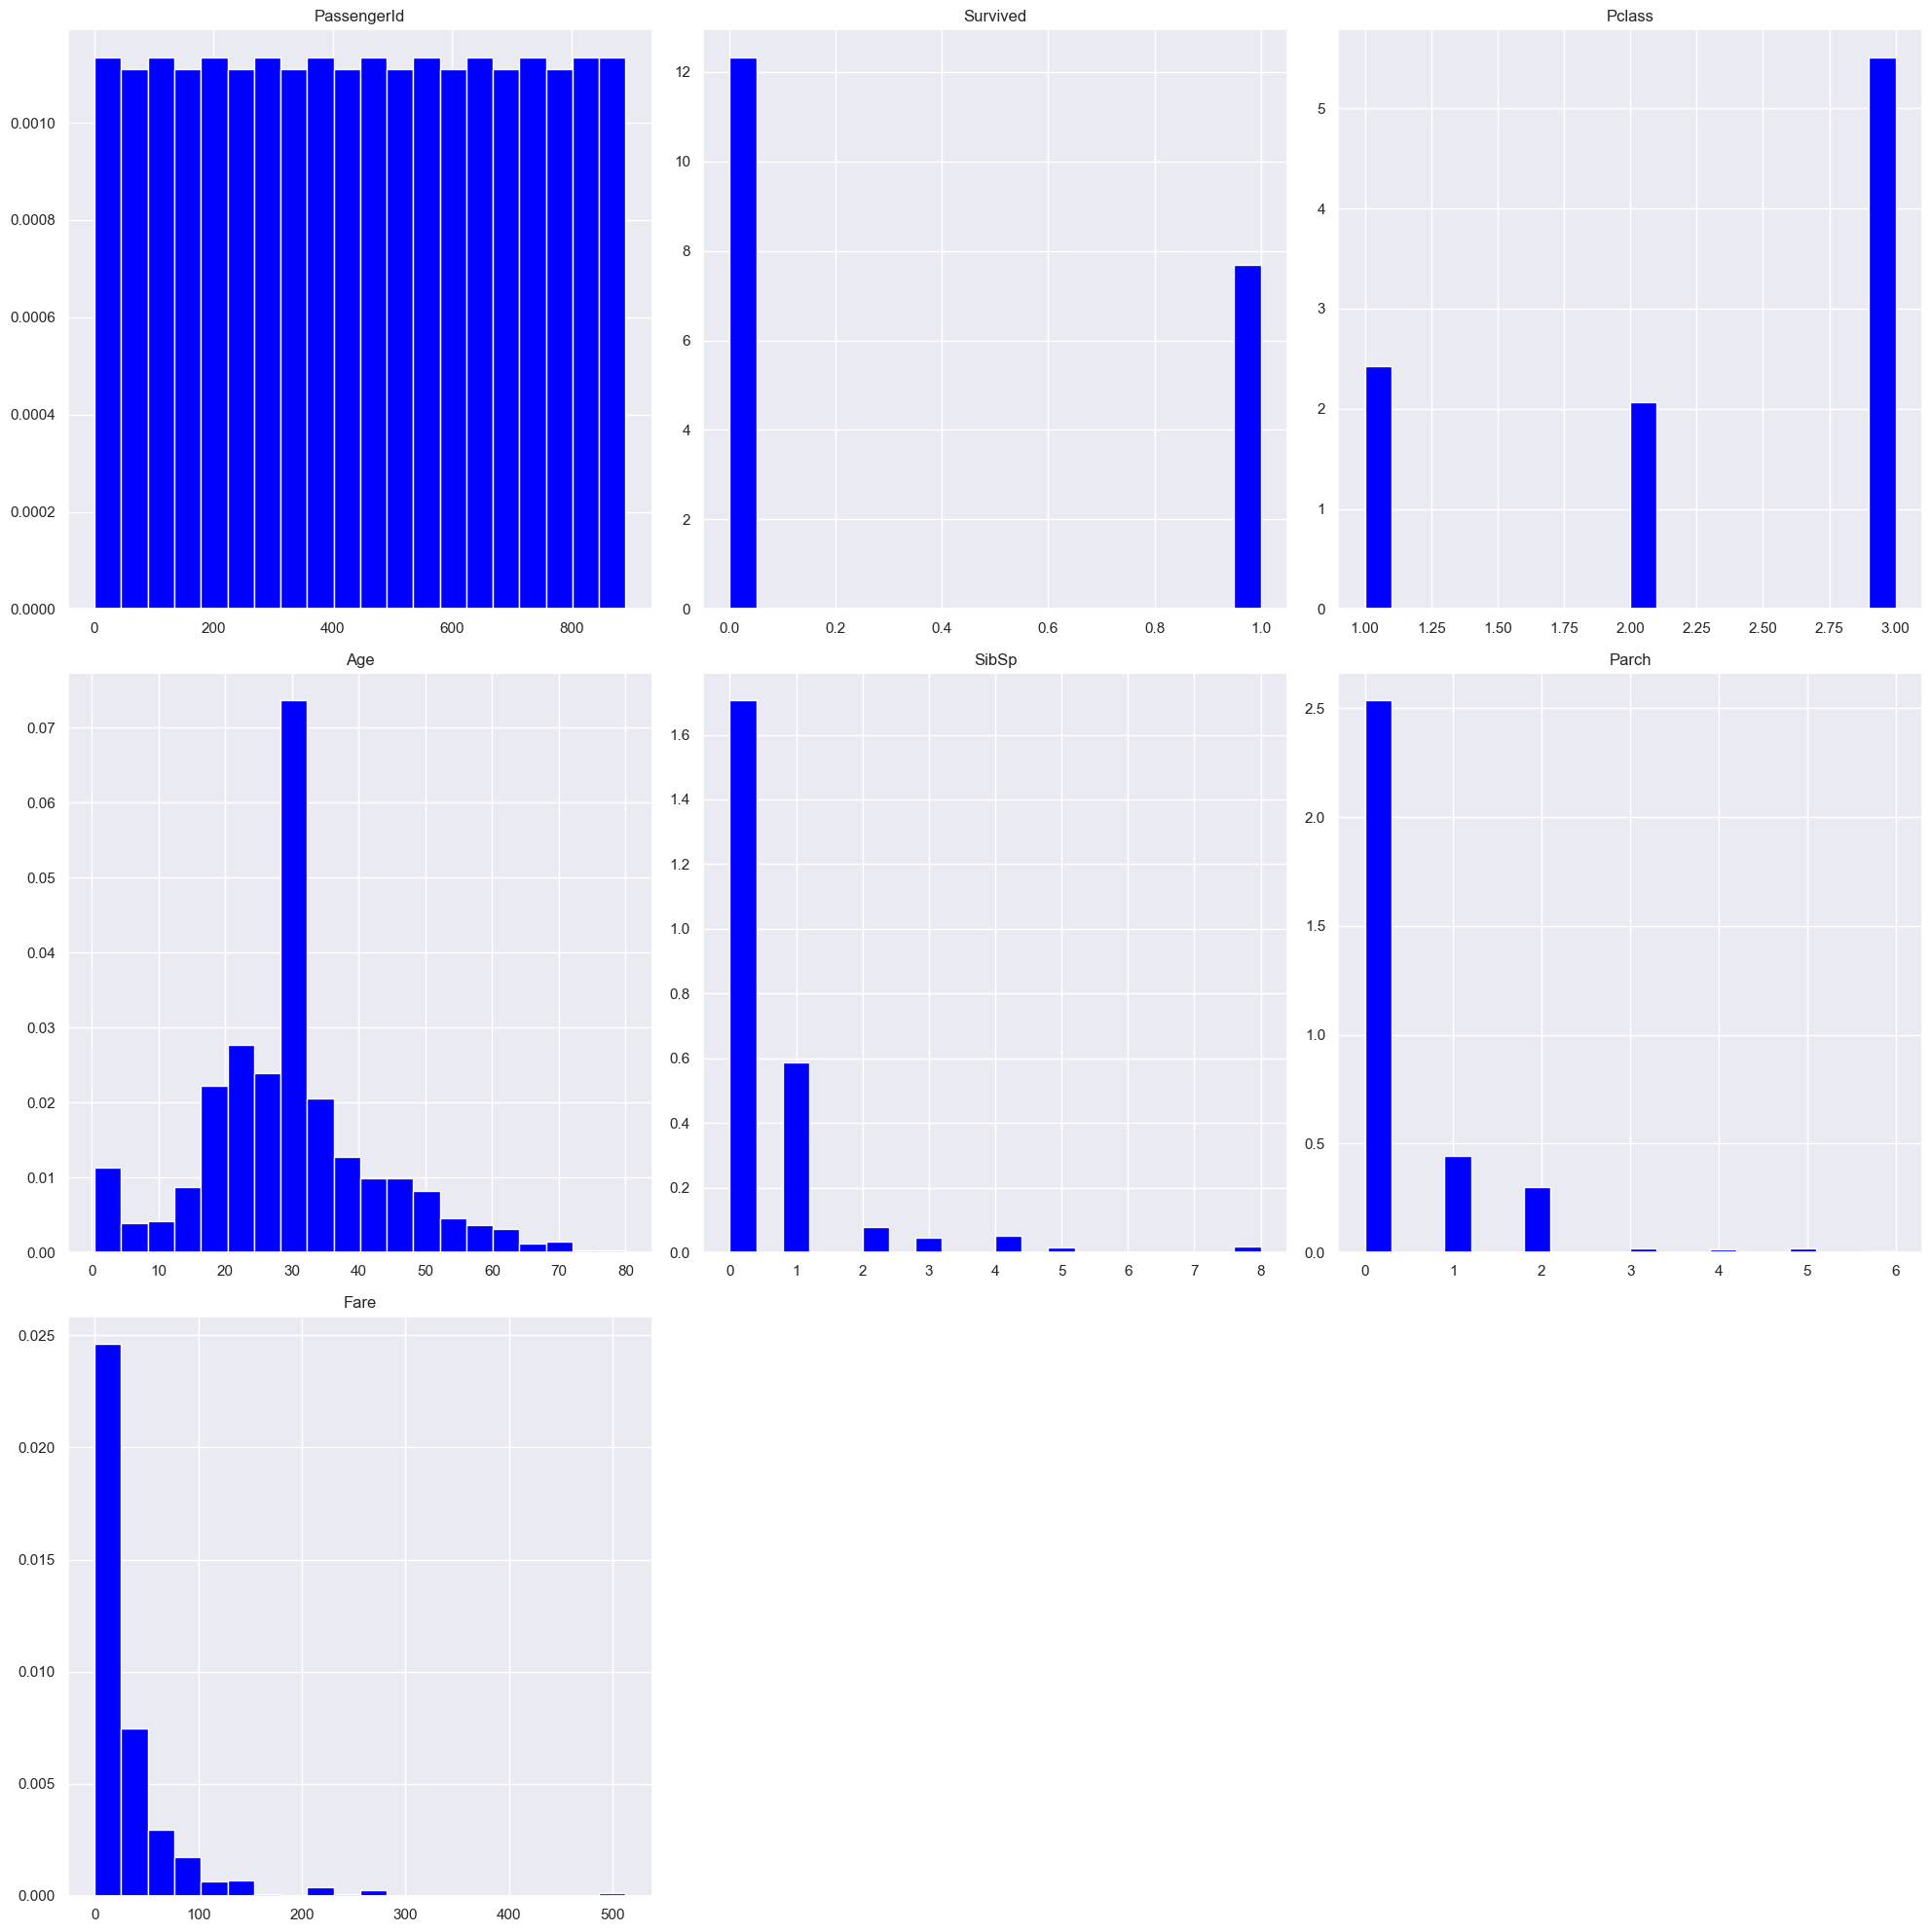

In [39]:
plt.rcParams['figure.figsize']=(20,20)
df_titanic.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

PassengerId       Axes(0.125,0.712609;0.168478x0.167391)
Survived       Axes(0.327174,0.712609;0.168478x0.167391)
Pclass         Axes(0.529348,0.712609;0.168478x0.167391)
Age            Axes(0.731522,0.712609;0.168478x0.167391)
SibSp             Axes(0.125,0.511739;0.168478x0.167391)
Parch          Axes(0.327174,0.511739;0.168478x0.167391)
Fare           Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

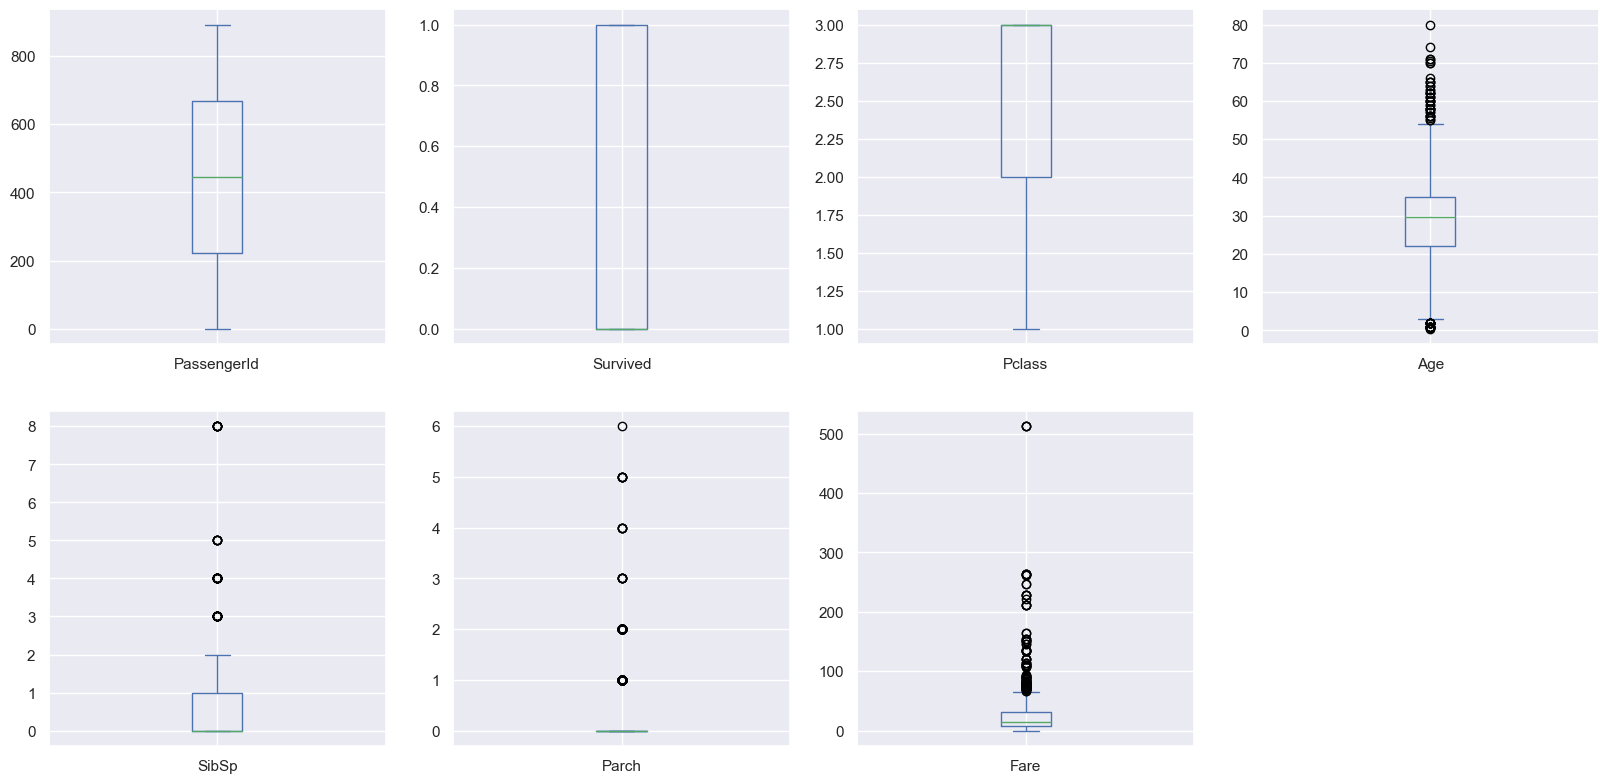

In [40]:
df_titanic.plot(kind='box',subplots=True,layout=(4,4),sharex=False)

# Heatmap for expressing correlation:-

<Axes: >

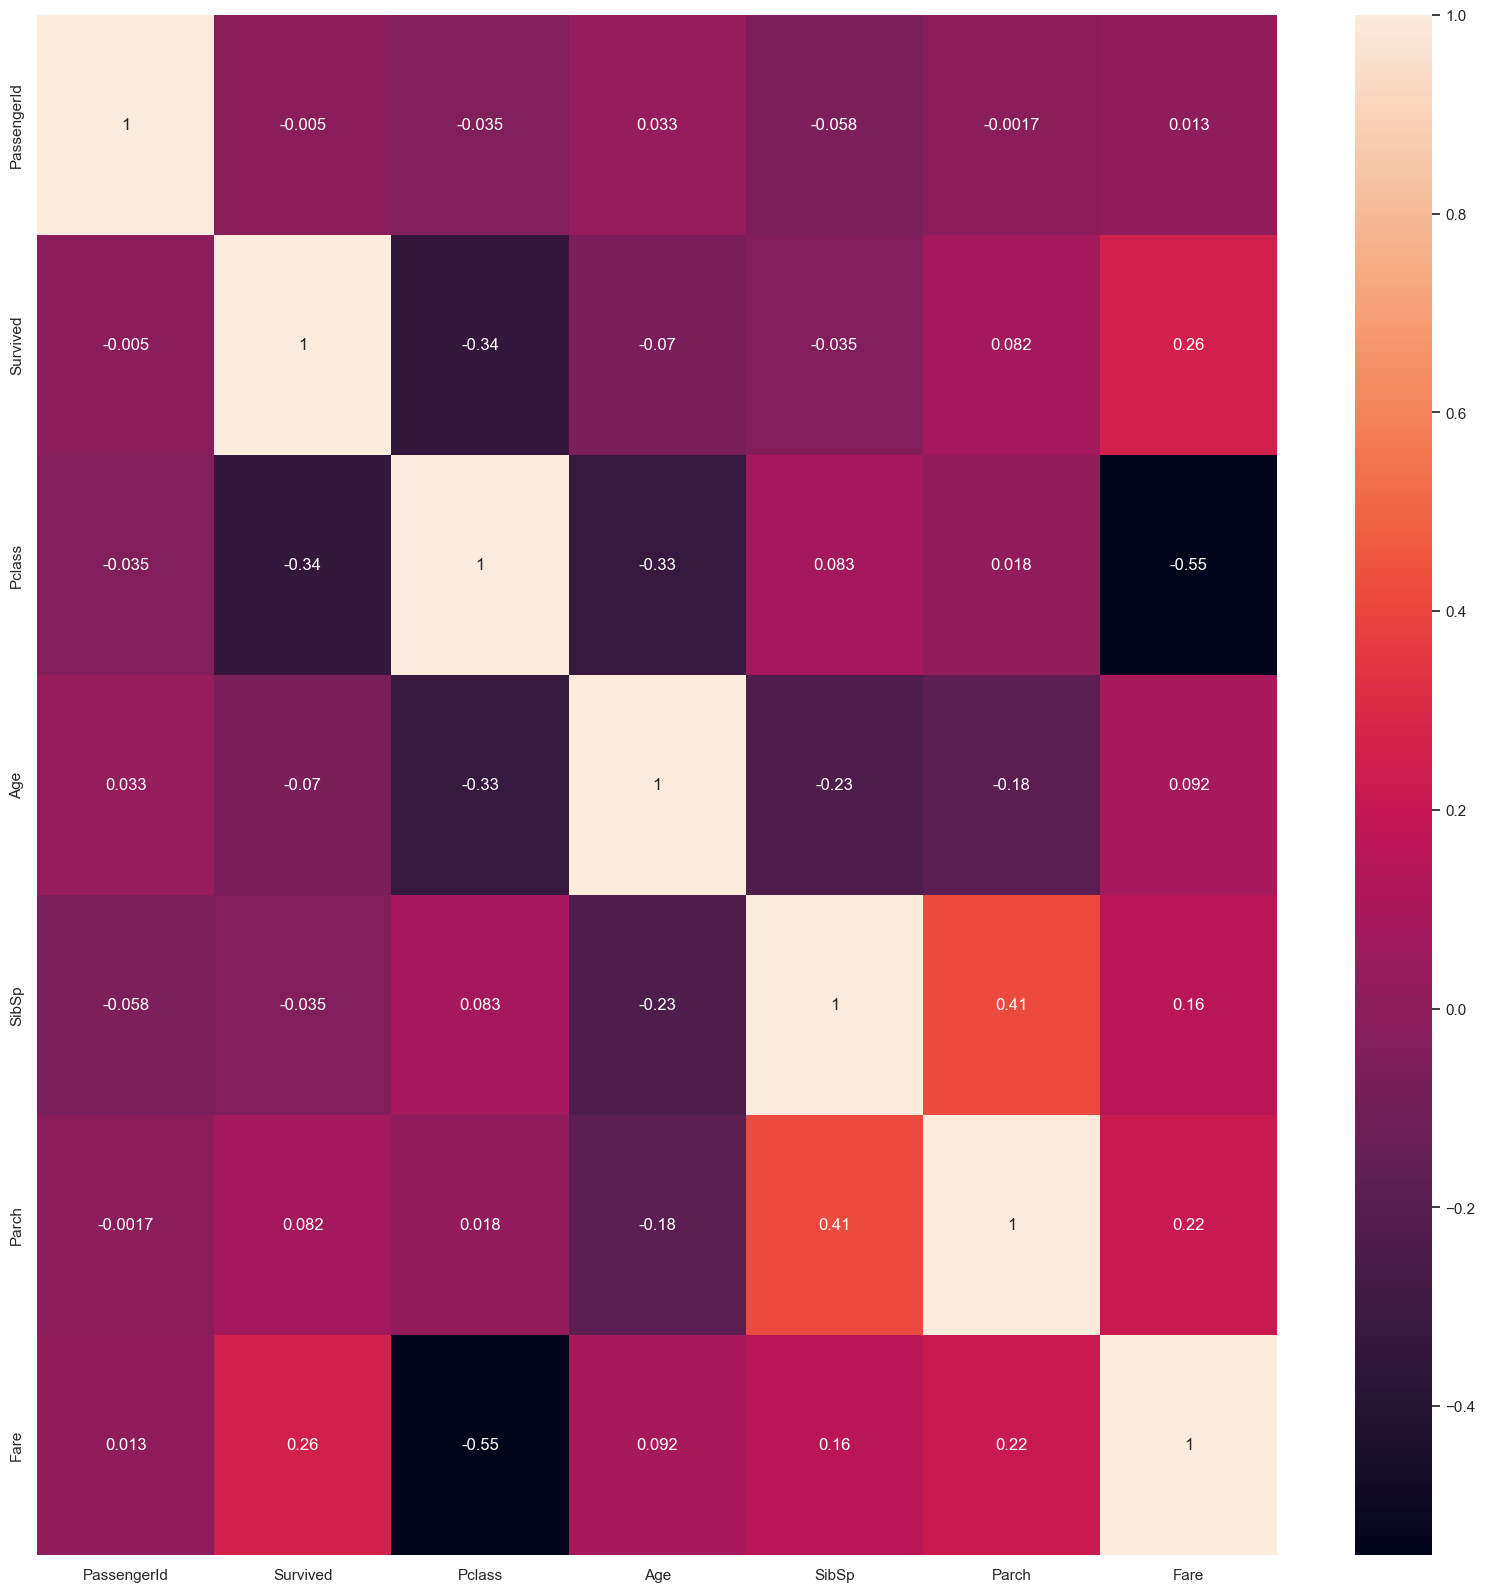

In [41]:
corr=df_titanic.corr()
sns.heatmap(corr,annot=True)

# Encoding the categorical columns:-

In [42]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
df_titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Using Label Encoder:-

In [44]:
#converting data to numerical type using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df_titanic.Sex.drop_duplicates())
df_titanic.Sex= label.transform(df_titanic.Sex)

label.fit(df_titanic.Embarked.drop_duplicates())
df_titanic.Embarked= label.transform(df_titanic.Embarked)

df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [45]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

In [46]:
x=df_titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1) #List of all feature
y=df_titanic['Survived'] #Label

print(x.shape)
print(y.shape)

(891, 7)
(891,)


In [47]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Feature Scaling:-

In [49]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.585954
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.585954
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.585954
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.942303


# Multicollinearity using Variance_inflation_factor:

In [50]:
import statsmodels

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns

In [53]:
vif

,vif,Features
0,1.671580,Pclass
1,1.108869,Sex
2,1.205639,Age
3,1.282325,SibSp
4,1.322550,Parch
5,1.648696,Fare
6,1.079324,Embarked


# Splitting the data into training and testing data:-

In [54]:
#import libraries:-
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [55]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        rs=i
print('Best Score:',maxAcc)
print('Random_state:',rs)

Best Score: 0
Random_state: 999


In [56]:
#let us split the data now at that random state:-

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=999)
print("size of x_train:",X_train.shape)
print("size of x_test:",X_test.shape)
print("size of y_train:",y_train.shape)
print("size of x_train:",y_test.shape)

size of x_train: (668, 7)
size of x_test: (223, 7)
size of y_train: (668,)
size of x_train: (223,)


# Model building:-

In [57]:
def classify(clf,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=999)
    
    #training the model:-
    clf.fit(X_train,y_train)
    
    pred=clf.predict(X_test)
    
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy_score:",acc_score)
    
    #confusion matrix:-
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    
    #classification report:-
    class_report=classification_report(y_test,pred)
    print('n\Classification Report:\n',class_report)
    
    #cross validation score:-
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #Result of accuracy minus cv scores:-
    result=acc_score - cv_score
    print("\n Accuracy Score - cross validation score is",result)    

# Logistic Regression:-

In [58]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy_score: 0.7847533632286996
Confusion matrix:
 [[130  16]
 [ 32  45]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.74      0.58      0.65        77

    accuracy                           0.78       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.78      0.78      0.78       223

Cross Validation Score: 0.7845207457158998

 Accuracy Score - cross validation score is 0.00023261751279979315


# Decision Tree Classifier:-

In [59]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy_score: 0.757847533632287
Confusion matrix:
 [[120  26]
 [ 28  49]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       146
           1       0.65      0.64      0.64        77

    accuracy                           0.76       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.76      0.76      0.76       223

Cross Validation Score: 0.7744586027242482

 Accuracy Score - cross validation score is -0.016611069091961195


# Random forest classifier:-

In [60]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy_score: 0.7892376681614349
Confusion matrix:
 [[126  20]
 [ 27  50]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.71      0.65      0.68        77

    accuracy                           0.79       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.79      0.79      0.79       223

Cross Validation Score: 0.8182223338145753

 Accuracy Score - cross validation score is -0.028984665653140396


# SVC using linear kernel:-

In [61]:
clf=SVC(kernel='linear')
classify(clf,X,y)

Accuracy_score: 0.7713004484304933
Confusion matrix:
 [[128  18]
 [ 33  44]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.83       146
           1       0.71      0.57      0.63        77

    accuracy                           0.77       223
   macro avg       0.75      0.72      0.73       223
weighted avg       0.77      0.77      0.76       223

Cross Validation Score: 0.7878601468834348

 Accuracy Score - cross validation score is -0.016559698452941474


# SVC using poly kernel:-

In [62]:
clf=SVC(kernel='poly')
classify(clf,X,y)

Accuracy_score: 0.7892376681614349
Confusion matrix:
 [[133  13]
 [ 34  43]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.77      0.56      0.65        77

    accuracy                           0.79       223
   macro avg       0.78      0.73      0.75       223
weighted avg       0.79      0.79      0.78       223

Cross Validation Score: 0.8092461239093591

 Accuracy Score - cross validation score is -0.020008455747924203


# SVC using rbf kernel:-

In [63]:
clf=SVC(kernel='rbf')
classify(clf,X,y)

Accuracy_score: 0.8026905829596412
Confusion matrix:
 [[133  13]
 [ 31  46]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.78      0.60      0.68        77

    accuracy                           0.80       223
   macro avg       0.80      0.75      0.77       223
weighted avg       0.80      0.80      0.80       223

Cross Validation Score: 0.827154604230745

 Accuracy Score - cross validation score is -0.02446402127110381


# KNeighbors Classifier:-

In [64]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy_score: 0.8071748878923767
Confusion matrix:
 [[134  12]
 [ 31  46]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       146
           1       0.79      0.60      0.68        77

    accuracy                           0.81       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.81      0.81      0.80       223

Cross Validation Score: 0.8013684012303056

 Accuracy Score - cross validation score is 0.005806486662071064


In [65]:
import xgboost as xgb

# XGB classifier:-

In [66]:
clf=xgb.XGBClassifier()
classify(clf,X,y)

Accuracy_score: 0.7937219730941704
Confusion matrix:
 [[126  20]
 [ 26  51]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.72      0.66      0.69        77

    accuracy                           0.79       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223

Cross Validation Score: 0.8148327160881301

 Accuracy Score - cross validation score is -0.021110742993959764


# Gradient Boosting Classifier:-

In [67]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy_score: 0.8026905829596412
Confusion matrix:
 [[133  13]
 [ 31  46]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.78      0.60      0.68        77

    accuracy                           0.80       223
   macro avg       0.80      0.75      0.77       223
weighted avg       0.80      0.80      0.80       223

Cross Validation Score: 0.8215680120519743

 Accuracy Score - cross validation score is -0.01887742909233303


# GaussianNB:-

In [68]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
classify(clf,X,y)

Accuracy_score: 0.7847533632286996
Confusion matrix:
 [[128  18]
 [ 30  47]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.72      0.61      0.66        77

    accuracy                           0.78       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.78      0.78      0.78       223

Cross Validation Score: 0.7912685958194715

 Accuracy Score - cross validation score is -0.006515232590771913


from the above evaluation metrics, we can clearly see thatKNeighborsClassifier()  is giving best f1 score and least difference between accuracy score and cv score. so selecting KNeighborsClassifier() as our final model.

# Final Selected Model with higher accuracy:-

In [69]:
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
pred=Knn.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,pred))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print('n\Classification Report:\n',classification_report(y_test,pred))

Accuracy_score: 0.8071748878923767
Confusion matrix:
 [[134  12]
 [ 31  46]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       146
           1       0.79      0.60      0.68        77

    accuracy                           0.81       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.81      0.81      0.80       223



# Applying Grid Search:-

In [70]:
#lets define params:-

knn_params={
    'n_neighbors':range(1,30,2),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski'],
    'leaf_size':range(1,50,5)
}

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

In [73]:
from sklearn.model_selection import RepeatedStratifiedKFold,train_test_split,GridSearchCV

In [74]:
#grid seach:-

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=999)
grid_search=GridSearchCV(estimator=knn,param_grid=knn_params,n_jobs=1,cv=cv,scoring='accuracy',error_score=0)
grid_results=grid_search.fit(X_train,y_train)

In [75]:
#best model:-

final_model=knn.set_params(**grid_results.best_params_)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)

In [76]:
#Summarize results:-

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       146
           1       0.79      0.57      0.66        77

    accuracy                           0.80       223
   macro avg       0.79      0.74      0.76       223
weighted avg       0.80      0.80      0.79       223

[[134  12]
 [ 33  44]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}


In [77]:
acc_score=(accuracy_score(y_test,y_pred))
print("Accuracy_score:",acc_score)

Accuracy_score: 0.7982062780269058


#After tweaking parameters we are getting the best accuracy score is 0.7982 which is less than the accuracy score of KNeighborsClassifier(0.8071) without hyper parameter tunning,so lets save the model in by default Knn model.

# AUC ROC Curve:-

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [79]:
#predicting the probability of having 1 in the x_test:
y_pred_prob=knn.predict_proba(X_test)[:,1]

In [80]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

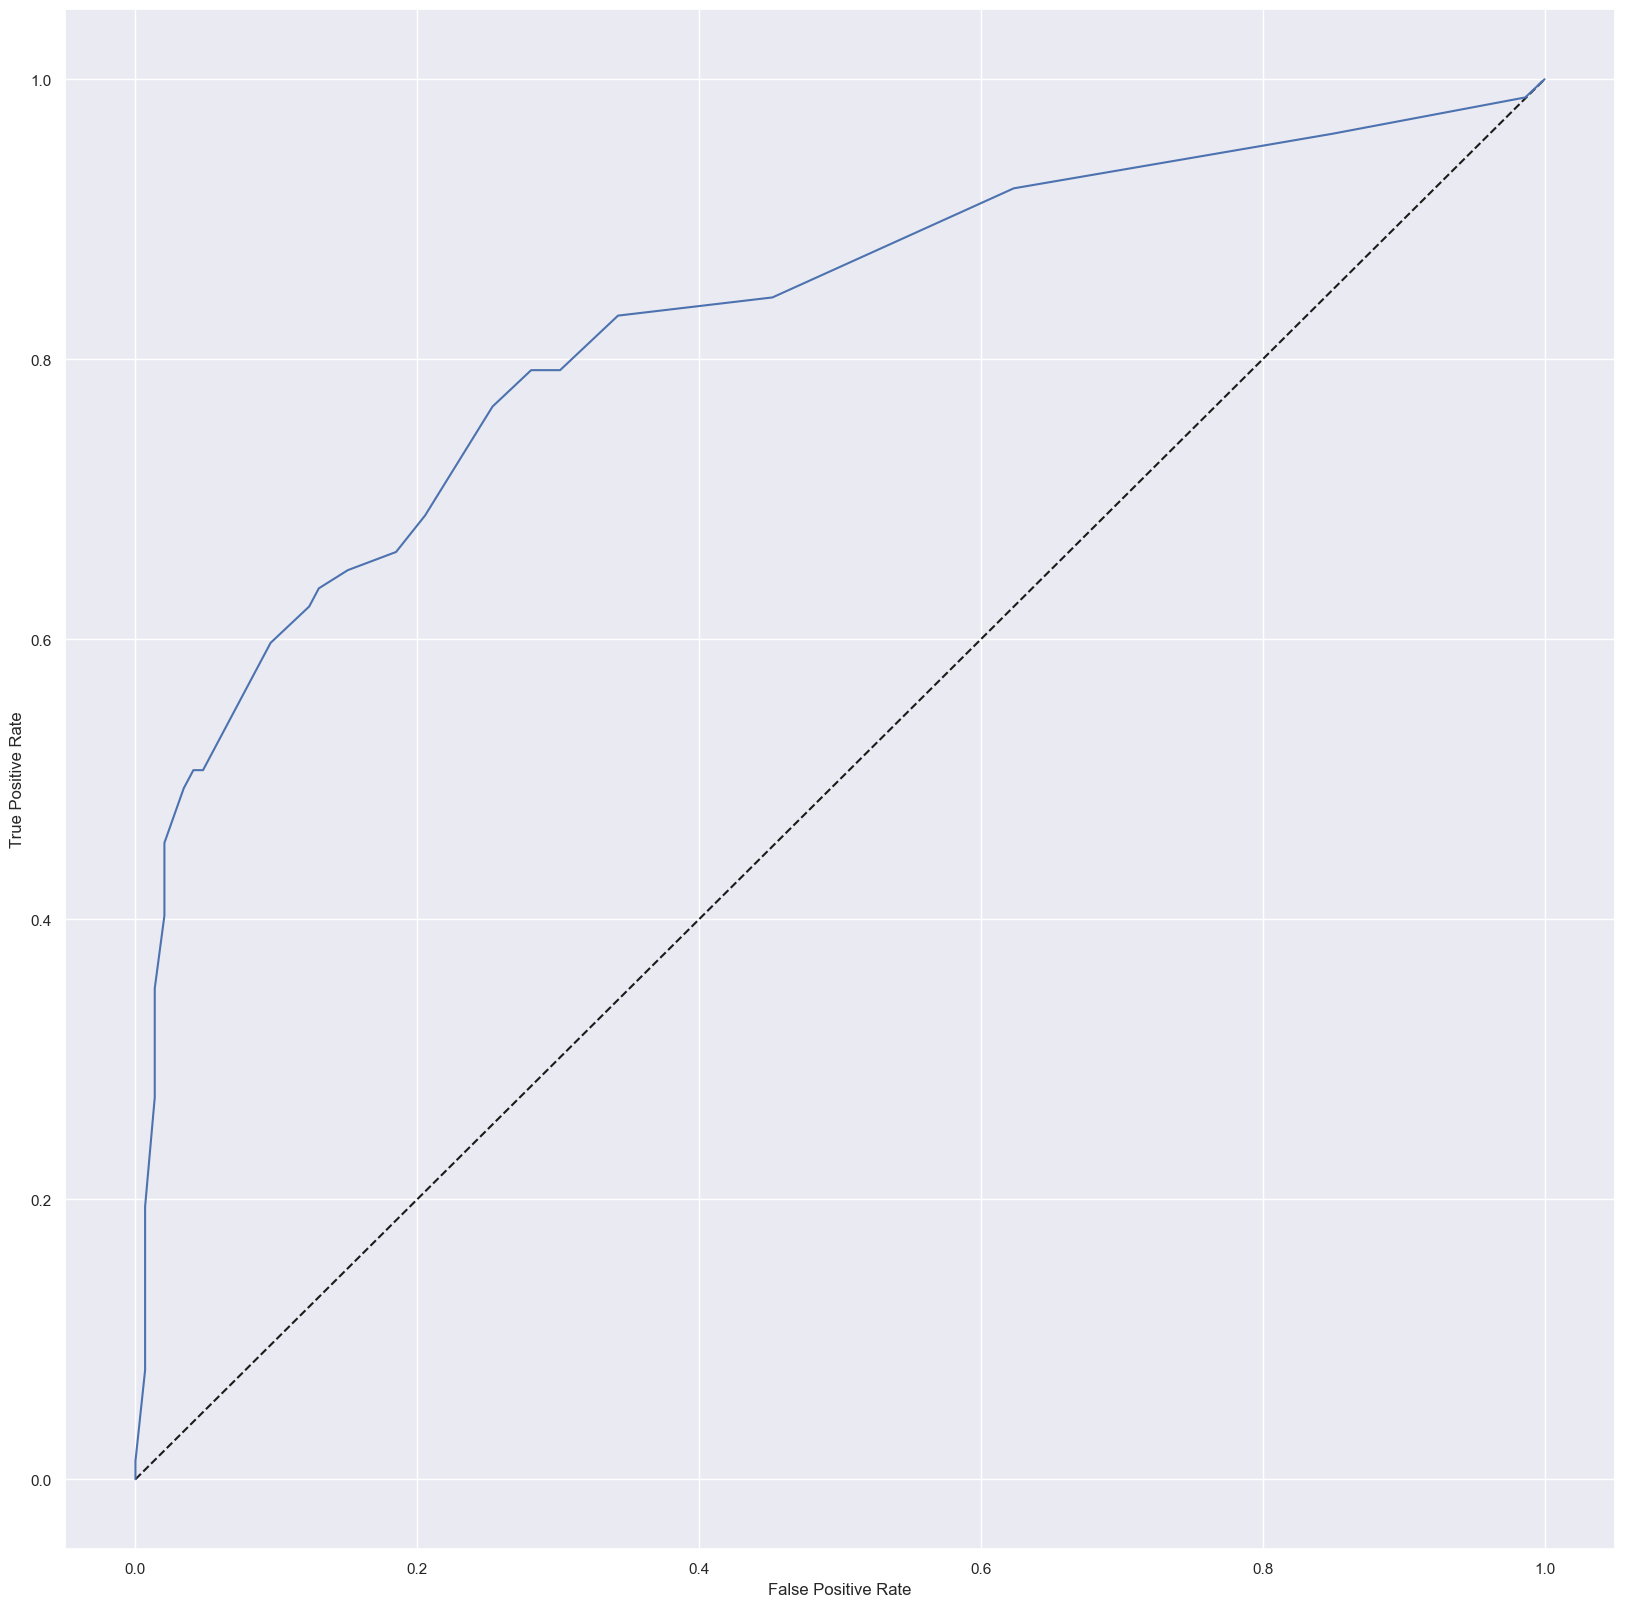

Score: 0.7446183953033269


In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(X_test))
print('Score:',auc_score)

# Confusion matrix for XGB classifier:-

In [82]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [84]:
confusion_matrix(y_test,y_pred)

array([[134,  12],
       [ 33,  44]], dtype=int64)

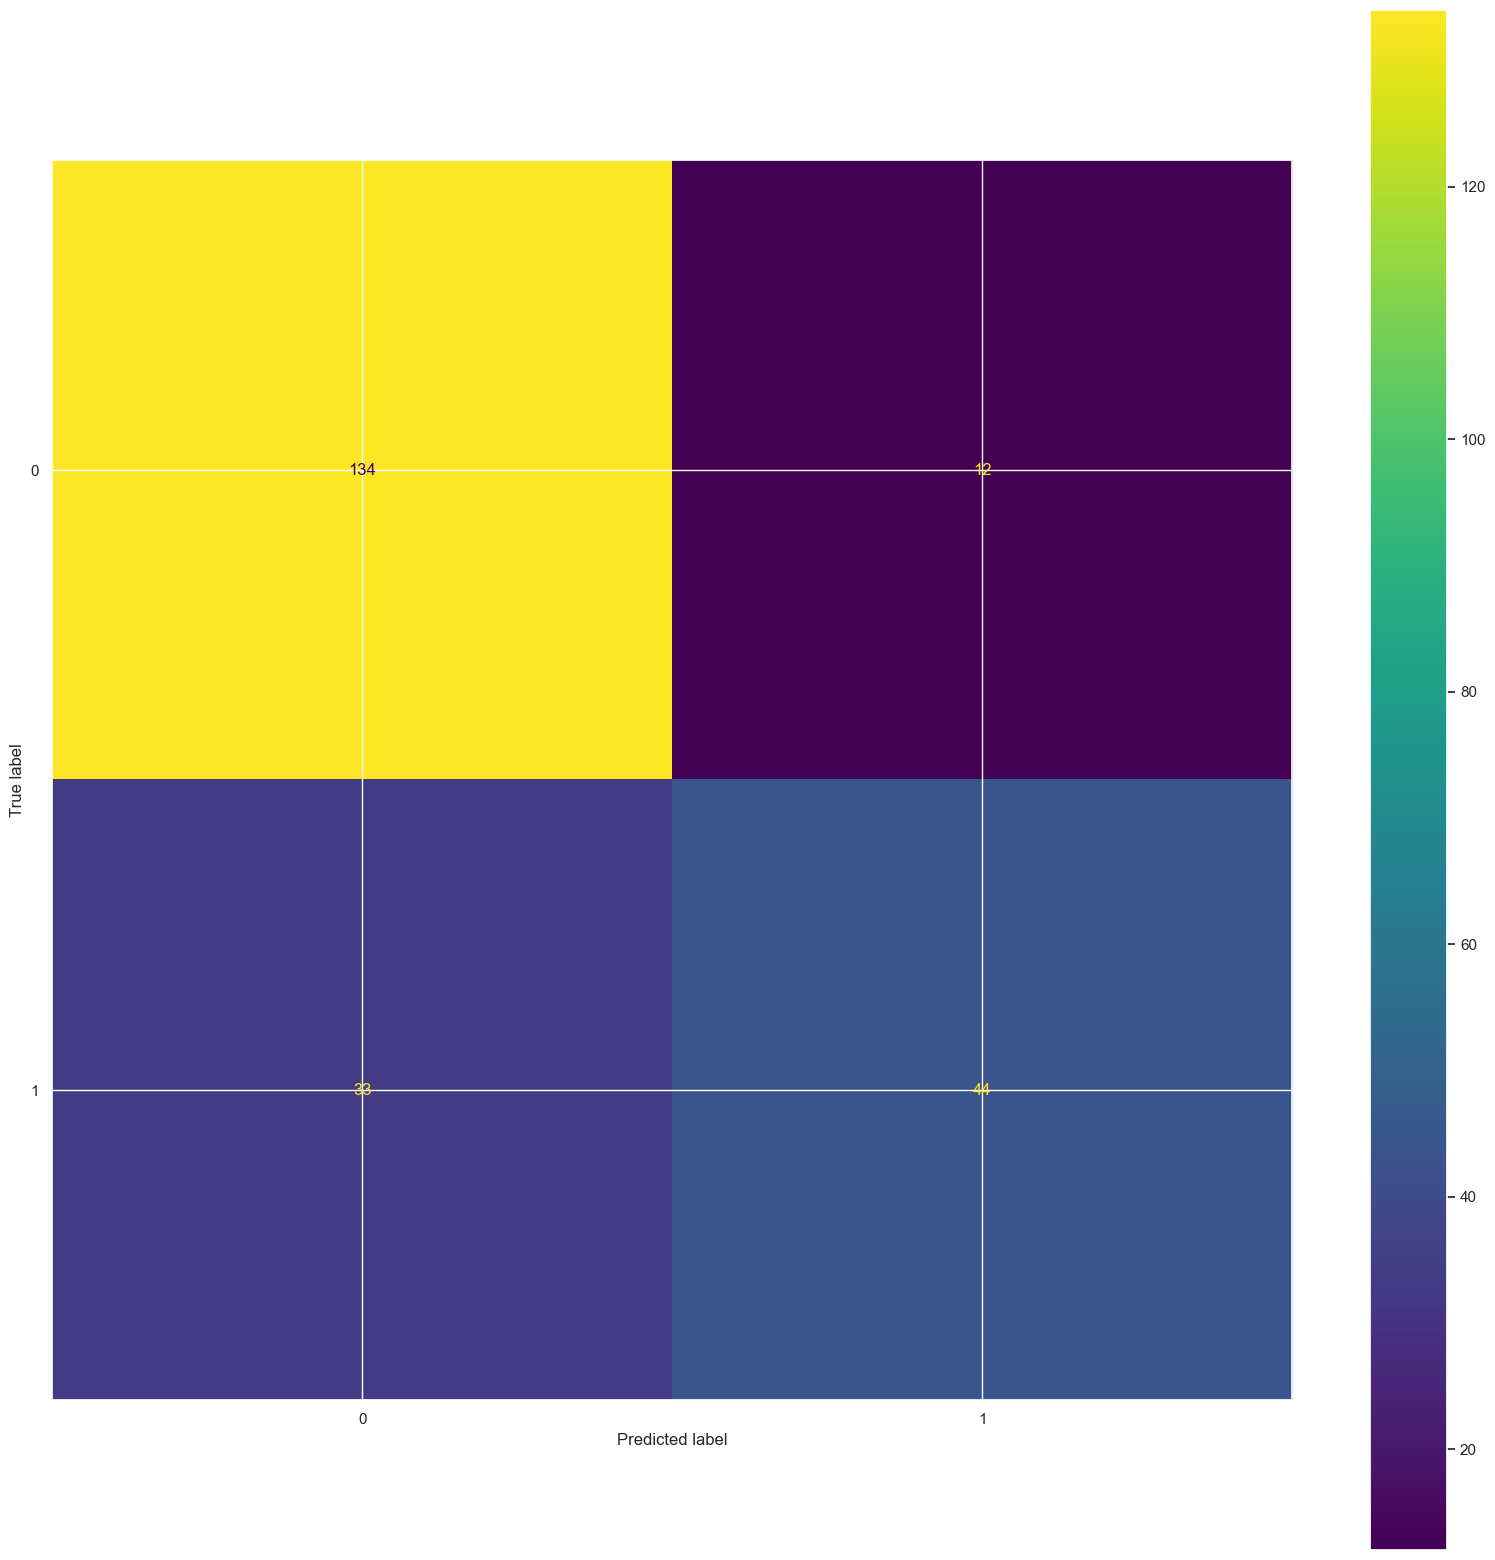

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       146
           1       0.79      0.57      0.66        77

    accuracy                           0.80       223
   macro avg       0.79      0.74      0.76       223
weighted avg       0.80      0.80      0.79       223



In [85]:
predictions=knn.predict(X_test)
cm=confusion_matrix(y_test,predictions,labels=knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

#With the help of above matrix we are able to understand the number of times we got the correct outputs and the number of times our ML model missed to provide the correct prediction.

# Saving My Best Model:-

In [86]:
#From sklearn.externals import joblib
import joblib

In [87]:
#Save the model as a object file:
joblib.dump(knn,'knnfile.obj')

['knnfile.obj']

In [88]:
#Load the model from the file:
knn_from_joblib=joblib.load('knnfile.obj')

In [89]:
#Use the loaded model to make predictions:
knn_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)